<center><font color="blue"><strong> Vafa Sabirli -  Task Scrappinp Bina_az</strong></font></center>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

<center><font color="blue"><strong> Reading Data</strong></font></center>

In [2]:
# Disable SSL verification
requests.packages.urllib3.disable_warnings()

# Define the base URL
base_url = "https://bina.az/baki/nerimanov/alqi-satqi/menziller/yeni-tikili?page="

# yigilacaq data ucun list yaradiriq
data_list = []

def scrape_page(page_number):
    
    url = base_url + str(page_number)
    response = requests.get(url, verify=False)
    
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # arasdirdiq ki items-i ile butun evlere access ede bilirik
        item_i_divs = soup.find_all(class_="items-i")
        
      
        for item_i_div in item_i_divs:
            # card classini tapmaq ucun
            card_params_div = item_i_div.find(class_="card_params")
            
            if card_params_div:
                # Qiymet tagini tapaq
                price_div = card_params_div.find(class_="price")

                span_elements = price_div.find_all("span")
                price_values = [span.text.strip() for span in span_elements]
                
                # m2 otaq sayi ve metebe melumati
                ul_elements = card_params_div.find_all("ul")
                
                # Extract the text content of the ul elements
                ul_values = [ul.text.strip() for ul in ul_elements]
                
                # adress ve saat  melumatlarini toplayaq
                city_when = card_params_div.find(class_='city_when')
                city_when_value = city_when.text.strip() if city_when else ""
                
                
                # Dictionary yaradiriq
                data_dict = {
                    "Price": price_values,
                    "UL_Values": ul_values,
                    "City_When": city_when_value
                }
                
                # Yigilian melumatlari liste elave edirik
                data_list.append(data_dict)

# 1 ci sehifeden baslayaraq
start_page = 1
# 20 qoy yoxla
end_page = 50  # bunu deyisdirib istenilen qeder sehife gezmek olar

# istenilen qeder sehife gezmek
for page_number in range(start_page, end_page + 1):
    print(f"bu deqiqe sehife :  {page_number}:")
    scrape_page(page_number)
    print("\n")
print('Proses bitdi')

# en son dataframe e ceviririk toplanilan datani
df = pd.DataFrame(data_list)


bu deqiqe sehife :  1:


bu deqiqe sehife :  2:


bu deqiqe sehife :  3:


bu deqiqe sehife :  4:


bu deqiqe sehife :  5:


bu deqiqe sehife :  6:


bu deqiqe sehife :  7:


bu deqiqe sehife :  8:


bu deqiqe sehife :  9:


bu deqiqe sehife :  10:


bu deqiqe sehife :  11:


bu deqiqe sehife :  12:


bu deqiqe sehife :  13:


bu deqiqe sehife :  14:


bu deqiqe sehife :  15:


bu deqiqe sehife :  16:


bu deqiqe sehife :  17:


bu deqiqe sehife :  18:


bu deqiqe sehife :  19:


bu deqiqe sehife :  20:


bu deqiqe sehife :  21:


bu deqiqe sehife :  22:


bu deqiqe sehife :  23:


bu deqiqe sehife :  24:


bu deqiqe sehife :  25:


bu deqiqe sehife :  26:


bu deqiqe sehife :  27:


bu deqiqe sehife :  28:


bu deqiqe sehife :  29:


bu deqiqe sehife :  30:


bu deqiqe sehife :  31:


bu deqiqe sehife :  32:


bu deqiqe sehife :  33:


bu deqiqe sehife :  34:


bu deqiqe sehife :  35:


bu deqiqe sehife :  36:


bu deqiqe sehife :  37:


bu deqiqe sehife :  38:


bu deqiqe sehife :  3

In [3]:
df['price'] = [str(i[0]).replace(' ','') for i in df.Price]
df['currency'] = [str(i[1]) for i in df.Price]
df.drop('Price',axis=1,inplace=True)

In [4]:
df['city'] = [i.split(',')[0] for i in df.City_When]
df['date'] = [i.split(',')[1] for i in df.City_When]
df.drop('City_When',axis=1,inplace=True)

In [5]:
df['rooms'] = [i[0][:8] for i in df.UL_Values]
df['size_m2'] = [i[0][8:11] for i in df.UL_Values]
df['floor'] = [i[0][-13:] for i in df.UL_Values]
df.drop('UL_Values',axis=1,inplace=True)

In [6]:
df

,price,currency,city,date,rooms,size_m2,floor
0,409400,AZN,Bakı,dünən 15:55,4 otaqlı,178,16/17 mərtəbə
1,275000,AZN,Bakı,13 sentyabr 2023,3 otaqlı,86,16/17 mərtəbə
2,257000,AZN,Bakı,21 sentyabr 2023,2 otaqlı,106,10/17 mərtəbə
3,132000,AZN,Bakı,20 sentyabr 2023,2 otaqlı,53,14/14 mərtəbə
4,697000,AZN,Bakı,bugün 12:46,4 otaqlı,225,m²6/8 mərtəbə
...,...,...,...,...,...,...,...
1395,245560,AZN,Bakı,18 sentyabr 2023,3 otaqlı,175,12/16 mərtəbə
1396,245000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,86,11/16 mərtəbə
1397,350000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,115,15/16 mərtəbə
1398,365000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,171,14/16 mərtəbə


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1400 non-null   object
 1   currency  1400 non-null   object
 2   city      1400 non-null   object
 3   date      1400 non-null   object
 4   rooms     1400 non-null   object
 5   size_m2   1400 non-null   object
 6   floor     1400 non-null   object
dtypes: object(7)
memory usage: 76.7+ KB


In [8]:
df.describe()

,price,currency,city,date,rooms,size_m2,floor
count,1400,1400,1400,1400,1400,1400,1400
unique,303,1,1,349,9,201,179
top,350000,AZN,Bakı,21 sentyabr 2023,3 otaqlı,140,16/17 mərtəbə
freq,37,1400,1400,277,649,42,53


In [9]:
df

,price,currency,city,date,rooms,size_m2,floor
0,409400,AZN,Bakı,dünən 15:55,4 otaqlı,178,16/17 mərtəbə
1,275000,AZN,Bakı,13 sentyabr 2023,3 otaqlı,86,16/17 mərtəbə
2,257000,AZN,Bakı,21 sentyabr 2023,2 otaqlı,106,10/17 mərtəbə
3,132000,AZN,Bakı,20 sentyabr 2023,2 otaqlı,53,14/14 mərtəbə
4,697000,AZN,Bakı,bugün 12:46,4 otaqlı,225,m²6/8 mərtəbə
...,...,...,...,...,...,...,...
1395,245560,AZN,Bakı,18 sentyabr 2023,3 otaqlı,175,12/16 mərtəbə
1396,245000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,86,11/16 mərtəbə
1397,350000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,115,15/16 mərtəbə
1398,365000,AZN,Bakı,18 sentyabr 2023,3 otaqlı,171,14/16 mərtəbə


In [10]:
#Datadan City və Date sütunları silirik, çünki ancaq Bakı şəhəri üzrədir, bizim analizimizə heç bir şey qatyamayacaq.
#Tarixin də bizim üçün burda bir önəmi yoxdur.
#Satışa qoyulan mənzillərin hər biri AZN üzərindən satıldığı üçün bizə heç bir dəyər ifadə etmir.
df.drop(columns = ['city', 'date', 'currency'], axis = 1, inplace = True)

In [11]:
df.head()

,price,rooms,size_m2,floor
0,409400,4 otaqlı,178,16/17 mərtəbə
1,275000,3 otaqlı,86,16/17 mərtəbə
2,257000,2 otaqlı,106,10/17 mərtəbə
3,132000,2 otaqlı,53,14/14 mərtəbə
4,697000,4 otaqlı,225,m²6/8 mərtəbə


In [12]:
df.isna().sum(),df.duplicated().sum()

(price      0
 rooms      0
 size_m2    0
 floor      0
 dtype: int64,
 344)

##### Heç bir null dəyərlərimiz yoxdur, təkrarlanan sətirlərimiz də mövcud deyil.

<center><font color="blue"><strong> Data Cleaning</strong></font></center>

##### Datamızdakı sütunları əlavə məlumatlardan təmizləyərək integer data tipinə çevirək.

In [13]:
df['rooms'] = df['rooms'].str.replace(' otaqlı', '').astype(int)

In [14]:
df

,price,rooms,size_m2,floor
0,409400,4,178,16/17 mərtəbə
1,275000,3,86,16/17 mərtəbə
2,257000,2,106,10/17 mərtəbə
3,132000,2,53,14/14 mərtəbə
4,697000,4,225,m²6/8 mərtəbə
...,...,...,...,...
1395,245560,3,175,12/16 mərtəbə
1396,245000,3,86,11/16 mərtəbə
1397,350000,3,115,15/16 mərtəbə
1398,365000,3,171,14/16 mərtəbə


In [15]:
# Verilmiş dəyəri emal etmək üçün funksiya təyin edək
def process_value(value):
    # Dəyəri '/' simvoluna əsasən bölək və birinci hissəni götürək, sonra '²' simvolunu çıxaraq
    processed_value = value.split('/')[0].replace('²', '')
    return processed_value

# Məlumat çərçivəsindəki xüsusi sütunu manipulyasiya edərək yeni sütun yaradaq
df['floor'] = df['floor'].apply(process_value)

print(df['floor'])


0       16
1       16
2       10
3       14
4       m6
        ..
1395    12
1396    11
1397    15
1398    14
1399    14
Name: floor, Length: 1400, dtype: object


In [16]:
df.floor.unique()

array(['16', '10', '14', 'm6', 'm2', '9', '4', '12', 'm4', '6', '3', '7',
       '8', '5', 'm3', '13', '17', '15', '11', 'm5', '19', '18', 'm7',
       '20', '2', '21', 'm8', 'm9', 'm1', '23'], dtype=object)

In [17]:
df['floor'] = df['floor'].str.replace('m', '').astype(int)

In [18]:
df['price'] = df['price'].astype(int)

In [19]:
df['size_m2'] = df['size_m2'].str.replace('.', '').astype(int)

In [20]:
df.dtypes

price      int32
rooms      int32
size_m2    int32
floor      int32
dtype: object

In [21]:
df.head()

,price,rooms,size_m2,floor
0,409400,4,178,16
1,275000,3,86,16
2,257000,2,106,10
3,132000,2,53,14
4,697000,4,225,6


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1400.0,286680.395714,152028.394412,89000.0,201300.0,262000.0,340000.0,3000000.0
rooms,1400.0,2.888571,0.849933,1.0,2.0,3.0,3.0,9.0
size_m2,1400.0,118.841429,52.242334,35.0,82.0,110.0,144.0,530.0
floor,1400.0,9.357143,4.523896,1.0,6.0,9.0,13.0,23.0


In [23]:
df = df.drop_duplicates()

In [24]:
df

,price,rooms,size_m2,floor
0,409400,4,178,16
1,275000,3,86,16
2,257000,2,106,10
3,132000,2,53,14
4,697000,4,225,6
...,...,...,...,...
1392,125000,2,48,13
1393,169820,2,121,12
1395,245560,3,175,12
1398,365000,3,171,14


#### Təcrübəyə əsasən fərqli elanlar olma ehtimalları zəif olduğundan, biz təkrarlanan sətirləri silirik.

### Feature Scalling

In [25]:
# Təcrübəyə əsasən alqı-satqı zamanı ehtimal olunan sövdələşmə güzəşti 5% götürülür.
df['deal_adjustment_price'] = df['price']*0.95

In [26]:
# Təcrübəyə əsasən MTK-ların verdiyi sənədlə Çıxarış arasında  fərq olduğundan (içdən-içə ölçü və eyvan sahəsiylə bağlı) sahə 10% azaldılmışdır.
df['size_adjustment'] = df['size_m2']*0.9

In [27]:
# Evin kvadrat metrinə düşən dəyəri tapırıq.
df['sqm_price'] = df['deal_adjustment_price'] / df['size_adjustment']

In [28]:
# Artıq elanda yer alan qiymət və evin sahəsi ütunları öz datamızdan silirik.
df.drop(['price', 'size_m2'], axis = 1, inplace = True)

In [29]:
df.head()

,rooms,floor,deal_adjustment_price,size_adjustment,sqm_price
0,4,16,388930.0,160.2,2427.777778
1,3,16,261250.0,77.4,3375.322997
2,2,10,244150.0,95.4,2559.224319
3,2,14,125400.0,47.7,2628.930818
4,4,6,662150.0,202.5,3269.876543


In [30]:
df['sqm_price'] = df['sqm_price'].apply(lambda x: round(x, 0))

In [31]:
df

,rooms,floor,deal_adjustment_price,size_adjustment,sqm_price
0,4,16,388930.0,160.2,2428.0
1,3,16,261250.0,77.4,3375.0
2,2,10,244150.0,95.4,2559.0
3,2,14,125400.0,47.7,2629.0
4,4,6,662150.0,202.5,3270.0
...,...,...,...,...,...
1392,2,13,118750.0,43.2,2749.0
1393,2,12,161329.0,108.9,1481.0
1395,3,12,233282.0,157.5,1481.0
1398,3,14,346750.0,153.9,2253.0


In [32]:
df.dtypes

rooms                      int32
floor                      int32
deal_adjustment_price    float64
size_adjustment          float64
sqm_price                float64
dtype: object

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,998.0,2.908818,0.872345,1.0,2.0,3.0,3.0,9.0
floor,998.0,9.172345,4.451269,1.0,5.0,8.0,12.0,23.0
deal_adjustment_price,998.0,272003.916232,153121.217130,84550.0,190000.0,251750.0,317775.0,2850000.0
size_adjustment,998.0,109.239078,49.403722,31.5,72.9,100.8,133.2,477.0
sqm_price,998.0,2569.524048,936.979753,736.0,2151.0,2528.5,2903.0,26389.0


In [34]:
df['sqm_price'].unique()

array([ 2428.,  3375.,  2559.,  2629.,  3270.,  2343.,  2436.,  2375.,
        3123.,  3213.,  3418.,  3050.,  1383.,  3412.,  3210.,  1847.,
        2111.,  3501.,  1997.,  2232.,  1999.,  2477.,  1873.,  1919.,
        2530.,  2660.,  3980.,  2612.,  2898.,  3026.,  3587.,  2321.,
        2284.,  2944.,  3225.,  3023.,  3203.,  1916.,  3131.,  2533.,
        3047.,  2738.,  2196.,  3252.,  2981.,  3721.,  2017.,  2679.,
        2714.,  2262.,  1990.,  2639.,  2873.,  2729.,  2516.,  2328.,
        4288.,  2105.,  2835.,  2888.,  2139.,  2773.,  2806.,  2003.,
        3519.,  3211.,  2487.,  2160.,  2226.,  2384.,  3037.,  2614.,
        2400.,  2820.,  3016.,  2363.,  2556.,  2222.,  3010.,  2797.,
        2414.,  2217.,  3271.,  2330.,  2830.,  2320.,  2460.,  2997.,
        1988.,  2903.,  1122.,  2298.,  2829.,  2783.,  2048.,  3349.,
        2646.,  2337.,  2466.,  1914.,  2634.,  2818.,  2838.,  3070.,
        3475.,  3732.,  2693.,  2840.,  2845.,  2591.,  3167.,  2837.,
      

In [35]:
df = df[(df['sqm_price'] >= 1500) & (df['sqm_price'] <= 4000)]

#### Lüks yaşayış kompleksində (Şəhər Bağları və s.) yerləşən mənzillər ortalama qiymətə təsir göstərdiyindən kvadratı 4500 manatdan yüksək olan mənzillər drop edilir. Eyni zamanda kvadratı 1500 manatdan az olan mənzillər həmin ərazidə reallığı əks etdirmədiyindən drop edilir.

In [36]:
df = df[(df['size_adjustment'] <= 250)]

#### Sahəsi 300 kvadrat metrdən yuxarı olan mənzillər dəyərə əsaslı təsir göstərdiyindən drop edilmişdir.

In [37]:
df = df[(df['deal_adjustment_price'] <= 500000)]

#### Qiyməti 500000 manatdan yuxarı olan mənzillər dəyərə əsaslı təsir göstərdiyindən və say olaraq az olduğundan drop edilmişdir.

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,929.0,2.831001,0.775755,1.0,2.0,3.0,3.0,6.0
floor,929.0,9.133477,4.460489,1.0,5.0,8.0,12.0,23.0
deal_adjustment_price,929.0,251974.453606,83336.429476,84550.0,188100.0,247000.0,308750.0,494000.0
size_adjustment,929.0,102.655221,39.332099,31.5,72.0,97.2,127.8,243.0
sqm_price,929.0,2544.440258,474.678533,1533.0,2180.0,2519.0,2873.0,3980.0


#### Correlation

<Axes: >

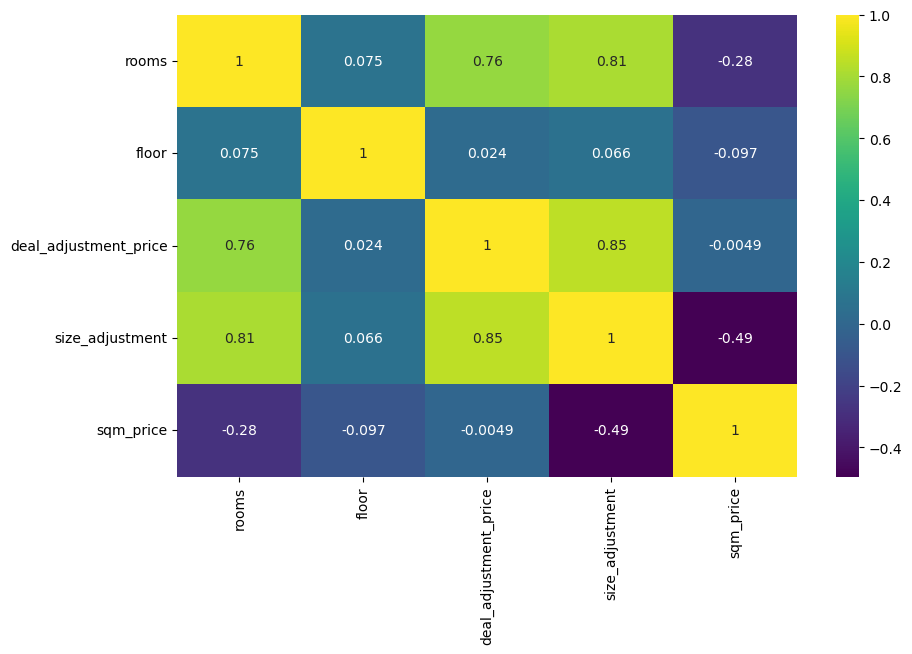

In [39]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr, cmap = 'viridis', annot = True)

#### Korelasiya qrafikinə baxdığımızda görürük ki, evin qiymətinə təsir göstərən əsas amil evin sahəsidir ki, aralarında 0.85-lik korelasiya əmsalı mövcuddur. Evin qiymətinə təsir göstərən bir digər əsas amil isə otaq sayısıdır. Belə bir fakt var ki, otaq sayısı ilə evin sahəsi arasındaki yüksək korelasiya əmsalının olması avtomatik olaraq ev qiyməti ilə otaq sayı arasındaı korelasiya əmsalını yüksəltməktədir. 
#### Lakin bizim datanın korelasiyasına baxdığımızda mərtəbənin evin qiymətinə təsir göstərmədiyini demək olar ki, çox bariz şəkildə görürük. Çünki korelasiya əmsalı 0-a yaxın bir dəyər almaqdadır.

<center><font color="blue"><strong> Data Visualization</strong></font></center>

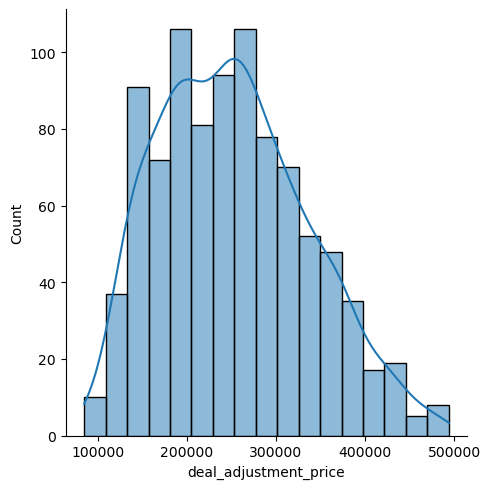

In [40]:
sns.displot(data = df, x = 'deal_adjustment_price', kde = True)

#### Ev qiymətlərinin dağılımına baxdıqda normal şəkildə dağılım göstərdiyini deyə bilərik. Əsas olaraq 200000-400000 arasında qiymətini dəyişdiyini görürük.

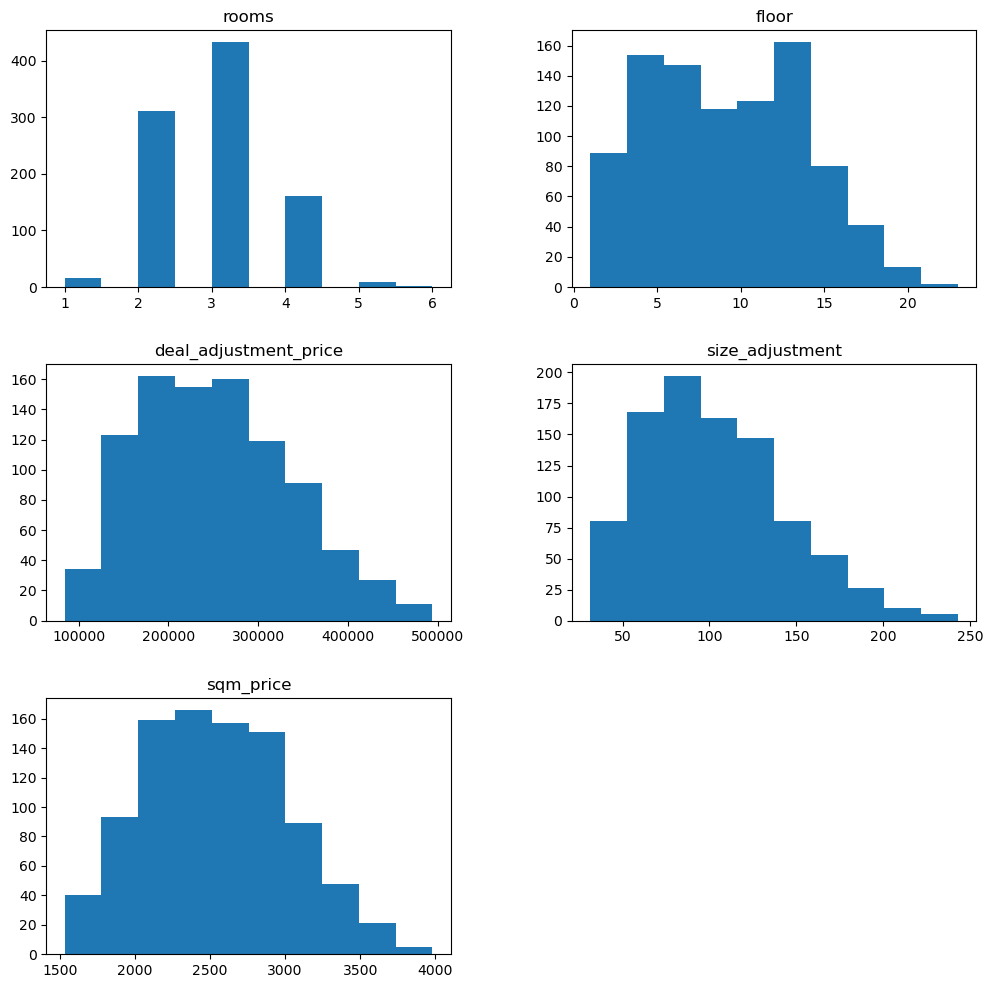

In [41]:
df._get_numeric_data().hist(figsize=(12,12), grid=False);

#### Yuxarıda gördüyünüz grafiklərlə biz bütün sütun dəyərlərimizin necə dağılım göstərdiyini görə bilirik. Məsələn, satışda ən çox 3 otaqlı mənzilin olduğunu grafik əsasında müəyyənləşdirmək mümkündür.

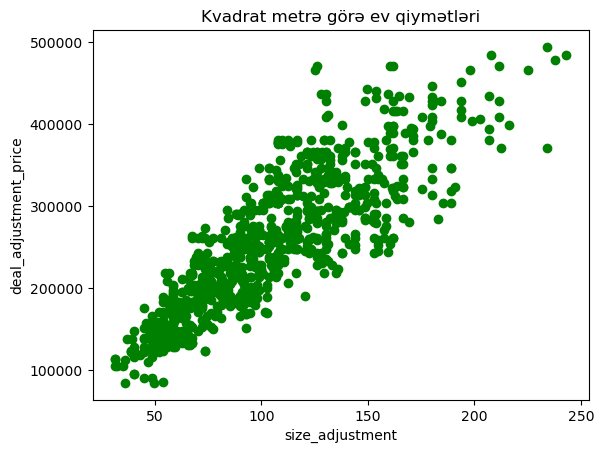

In [42]:
# Scatter grafiği çizimi
plt.scatter(df.size_adjustment, df.deal_adjustment_price, color='green', marker='o')
plt.xlabel('size_adjustment')
plt.ylabel('deal_adjustment_price')
plt.title('Kvadrat metrə görə ev qiymətləri')
plt.show()



#### Evin qiyməti ilə sahəsi arasındakı əlaqəyə qrafiklə nəzər yetirdiyimizdə görürük ki, evin sahəsi artdıqca qiyməti də artır. Aralarında xətti bir əlaqə mövcuddur.

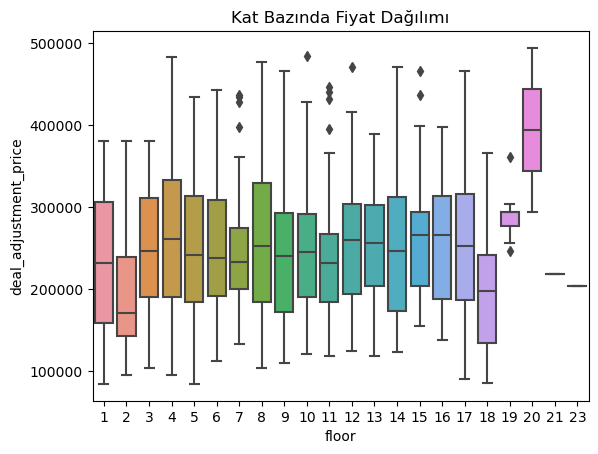

In [43]:
# Kutu grafiği çizelim
sns.boxplot(x='floor', y='deal_adjustment_price', data=df)
plt.xlabel('floor')
plt.ylabel('deal_adjustment_price')
plt.title('Kat Bazında Fiyat Dağılımı')
plt.show()


#### Bu qrafiklə biz fərqli mərtəbələrdə yer alan mənzillərin qiymət dağılımını görə bilirik.